In [1]:
# Install libraries
%pip install -U pysr


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: /home/richard/Documents/p311a/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Call Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from google.colab import drive
from pysr import PySRRegressor
import time
#import math
import sympy as sym

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [3]:
#CoLab
#drive.mount('/content/drive')
#df=pd.read_csv('/content/drive/MyDrive/goossens_raw.csv')
# Positron
df=pd.read_csv('./goossens_raw.csv')
# RStudio
#df=pd.read_csv('./c694/goossens_raw.csv')

y=df['MW']
x=df[['SG','TBP']]

In [4]:
t0 = time.time()
# Add Power Function
myMod=PySRRegressor(
    random_state=7,
    deterministic=True,
    parallelism='serial',
    binary_operators=["+","-","*","^"])
myMod.fit(x,y)
y_pred=myMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

/home/richard/Documents/p311a/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
/home/richard/Documents/p311a/lib/python3.11/site-packages/pysr/sr.py:96: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://ai.damtp.cam.ac.uk/pysr/tuning/
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 6.460e+04
Progress: 305 / 3100 total iterations (9.839%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.54
3           2.941e+04  5.897e-01  y = TBP - 270.61
5           1.789e+04  2.468e-01  y = (TBP * 0.026514) ^ 2.0737
7           1.396e+04  1.235e-01  y = ((TBP * 0.017914) + 0.34513) ^ 2.3647
9           6.571e+03  3.762e-01  y = ((0.93361 + (0.0060053 * TBP)) ^ 3.6541) - -0.80682
11          6.138e+03  3.384e-02  y = ((TBP * (-2.6518 - (TBP * -0.003256))) - -361.16) + 27...
                                      0.5
17          5.590e+03  1.550e-02  y = ((SG * TBP) + (((SG - TBP) * (TBP * 0.001762)) - (SG *...
                                       121.02))) * -1.2452
21          5.548e+03  1.743e-03  y = ((TBP +

[ Info: Final population:
[ Info: Results saved to:


time to fit:  79.08868527412415 seconds
  - outputs/20250721_181636_AF4GBe/hall_of_fame.csv


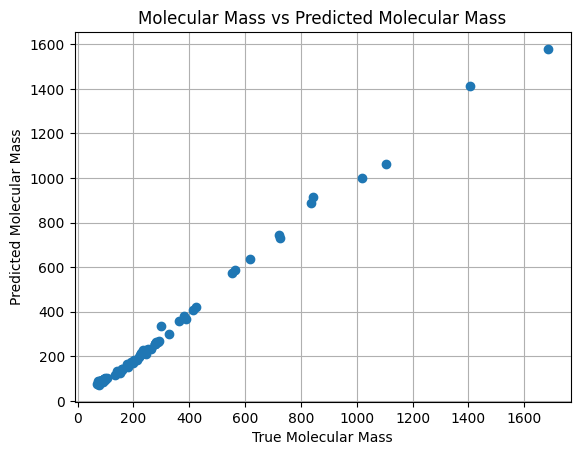

In [5]:
plt.plot(y,y_pred,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

In [6]:
# Pull Out Equation
myEq=myMod.sympy()
# Clean-Up Equation
sym.simplify(myEq)

1.91985312131962*5.046815**(SG**(-0.71983457) + 0.002978932*TBP) + 10.09363

In [7]:
# Add Prediction to Dataframe
df['Fit_Mw']=y_pred
# Calculate Correlation Coefficient between columns
df.corr()

,SG,TBP,MW,Fit_Mw
SG,1.000000,0.625218,0.334852,0.325151
TBP,0.625218,1.000000,0.869591,0.868747
MW,0.334852,0.869591,1.000000,0.997281
Fit_Mw,0.325151,0.868747,0.997281,1.000000


In [8]:
print(myMod)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          304.54074   
	1         0.592876                                    TBP - 270.62198   
	2         0.767049                    (TBP ^ 3.4250329) * 6.689649e-8   
	3         0.276489              (TBP * 0.0066112126) ^ (4.72649 - SG)   
	4         0.137448  ((SG ^ -1.2579492) * 6.035196e-8) * (TBP ^ 3.4...   
	5         0.543880  5.046815 ^ ((SG ^ -0.8946682) + ((TBP * 0.0029...   
	6   >>>>  0.230429  (5.046815 ^ (((TBP * 0.002978932) + (SG ^ -0.7...   
	7         0.042102  ((5.046815 ^ (((SG ^ -0.66946113) - -0.3144221...   
	8         0.068595  ((5.046815 ^ (((TBP * 0.002978932) - -0.314422...   
	9         0.001751  ((5.046815 ^ ((((TBP - 2.4430113) * 0.00297893...   
	10        0.000151  ((19.239042 * SG) + (5.046815 ^ (((0.002978932...   
	11        0.008650  ((5.046815 ^ ((SG ^ (0.17947164 - SG)) + (((TB...   
	12      